In [2]:

# import fundamental data science libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
df = pd.read_csv('alb.csv', sep=',')
df.head() # show the first five rows


,basura,apellidos,confirmaciones,boleta,calle,celular,ciudad,colonia,comentario,correo,...,nivelingles,nombre,nombrecompleto,porcentajecreditos,programaacademico,promedio,semestre,sexo,telefono,unidadacademica
0,Nombre de alumno,Correa Garduño,Pasaporte Comprobante inglés,2.015300e+09,Toronja lote 7 Manzana 8,5510501086,Ecatepec de Morelos,Granjas Independencia,"Buenas tardes o días. Tengo una ligera duda, e...",Alam_co@outlook.com,...,B1,Alam,Alam Correa Garduño,100.00,Ingeniería en Comunicaciones y Electrónica,9.20,9,Hombre,57806399,ESIME
1,Nombre de alumno,Ramírez Díaz,Carta Postulación Comprobante inglés,NaN,Prolongación Rojo Gómez 117,7711312317,Pachuca de Soto,NaN,NaN,ard300898@gmail.com,...,B1,Alberto,Alberto Ramírez Díaz,NaN,Ing: Mecatrónica,8.98,6,Hombre,NaN,UPIIH
2,Nombre de alumno,Arenales Herrera,Comprobante inglés,NaN,NaN,5521057031,NaN,NaN,NaN,aldo.arenales.h@gmail.com,...,B!,Aldo,Aldo Arenales Herrera,NaN,Mecatrónica,9.45,10,Hombre,NaN,UPIITA
3,Nombre de alumno,López Manríquez,Pasaporte Carta Postulación Comprobante inglés,NaN,Molina Enriquez Numero 23,5583713145,Mexico,San Pedro Xalostoc,El promedio que adjunte es el que marca actual...,sigma271@outlook.com,...,TOEFL ITP 510 B1,Ángel,Ángel López Manríquez,69.00,Ing. en sistemas computacionales,9.06,6,Hombre,5557419177,ESCOM
4,Nombre de alumno,Martínez Castro,Pasaporte Comprobante inglés,NaN,Puente de calderón 107,5532240687,Cuidad de México,San Bartolo Atepehuacan,NaN,a_mcastro98@outlook.com,...,B1,Angeles,Angeles Martínez Castro,62.68,Ingeniería en Alimentos,8.59,6,Hombre,57540064,UPIBI


In [10]:
df.columns

Index(['basura', 'apellidos', 'confirmaciones', 'boleta', 'calle', 'celular',
       'ciudad', 'colonia', 'comentario', 'correo', 'codigopostal', 'dictamen',
       'edad', 'estado', 'estatus', 'fechaegreso', 'fechanacimiento',
       'nacionalidad', 'nivelingles', 'nombre', 'nombrecompleto',
       'porcentajecreditos', 'programaacademico', 'promedio', 'semestre',
       'sexo', 'telefono', 'unidadacademica'],
      dtype='object')

In [11]:
# as you can see, the column basura is meaningless, so let's remove it
# by passing axis=1 a column will be removed, if you set inplace=True you'll modify the dataset itself
try: df = df.drop('basura', axis=1)
except: pass # column vector matrix[key] doesn't exist

In [18]:
males   = df[df['sexo'] == 'Hombre']
females = df[df['sexo'] == 'Mujer']
males_sorted = males.sort_values(['promedio'], ascending=False)
males_sorted[['nombre', 'promedio', 'unidadacademica']][:20] # show the attributes from the given list

,nombre,promedio,unidadacademica
31,Manuel Alejandro,9.50,ESFM
25,José Miguel,9.50,ESIA
2,Aldo,9.45,UPIITA
16,Ian,9.43,ESCOM
39,Tomas,9.36,UPIIZ
32,Marco Antonio,9.36,ENCB
9,David,9.34,UPIITA
6,Cedryc Froebel,9.29,ESIME-AZC
27,Juan Antonio,9.24,UPIITA
11,Fernando,9.21,ESIME-AZC


In [13]:
females_sorted = females.sort_values(['promedio'], ascending=False)
females_sorted[['nombre', 'promedio', 'unidadacademica']][:20] # show the attributes from the given list

,nombre,promedio,unidadacademica
8,Cristina,9.60,ESIT
20,Jimena Yadira,9.08,ESIME
35,Mitzi Fernanda,9.08,UPIITA
12,Gabriela Esther,9.02,UPIBI
34,Metzli Ahili,8.60,UPIIZ
14,Gabriela Michelle,8.16,ESFM
40,Verónica,8.13,UPIICSA
13,Gabriela,8.11,ESCOM


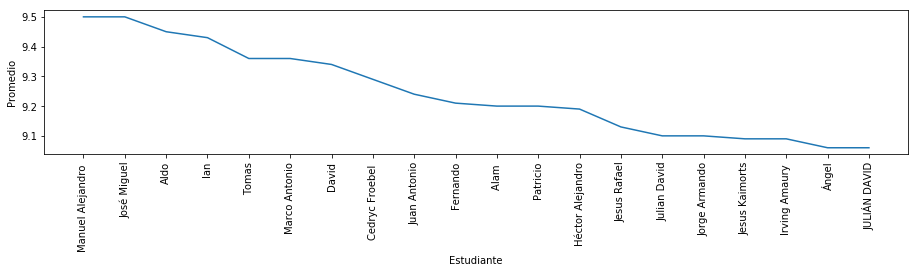

In [14]:
samples = males_sorted[:20]

fig = plt.figure(figsize=(12, 2))


ax = fig.add_axes([0, 0, 1, 1])
ax.plot(samples['nombre'], samples['promedio'])
ax.set_xlabel('Estudiante')
ax.tick_params(axis='x', labelrotation=90) # rotate x labels 90 degrees

ax.set_ylabel('Promedio')
ax

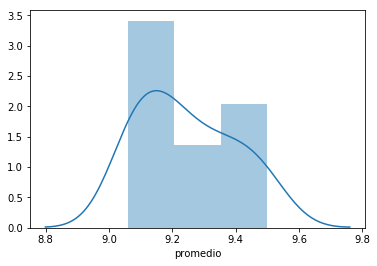

In [15]:
import seaborn as sns


# d = dict(zip(samples['nombre'], samples['promedio']))
d = dict(zip(range(len(samples['nombre'])), samples['promedio']))

sns.distplot(samples['promedio'])

In [29]:
set(males_sorted['porcentajecreditos'])

{nan,
 nan,
 nan,
 nan,
 57.84,
 62.08,
 62.68,
 63.16,
 63.2,
 63.82,
 65.2,
 66.05,
 66.17,
 66.98,
 69.0,
 72.0,
 72.01,
 74.74,
 74.76,
 75.0,
 79.93,
 81.0,
 85.0,
 86.37,
 88.02,
 90.12,
 90.24,
 100.0,
 448.5}

In [48]:
non_graduated_males = males_sorted[males_sorted['porcentajecreditos'] < 100] # remove graduated people
attrs = ['nombre', 'promedio', 'unidadacademica', 'porcentajecreditos']
print(f'|males| = {len(males)}, |non_graduated| = {len(non_graduated_males)}')
non_graduated_males[attrs]

|males| = 34, |non_graduated| = 26


,nombre,promedio,unidadacademica,porcentajecreditos
31,Manuel Alejandro,9.50,ESFM,75.00
25,José Miguel,9.50,ESIA,72.00
39,Tomas,9.36,UPIIZ,63.20
32,Marco Antonio,9.36,ENCB,72.01
9,David,9.34,UPIITA,66.17
27,Juan Antonio,9.24,UPIITA,62.08
11,Fernando,9.21,ESIME-AZC,57.84
37,Patricio,9.20,UPIIG,90.12
15,Héctor Alejandro,9.19,ESIME Azcapotzalco,90.24
28,Julian David,9.10,UPIITA,81.00


In [56]:

for place, value in enumerate(non_graduated_males.index):
    if value == 3: # my ID
        print(f"I'm in {place + 1}rd position")
        my_position = place + 1
        break

I'm in 13rd position


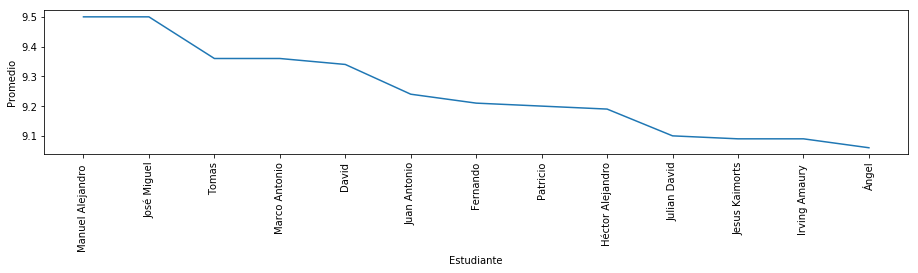

In [55]:
samples = non_graduated_males[:my_position]

fig = plt.figure(figsize=(12, 2))


ax = fig.add_axes([0, 0, 1, 1])
ax.plot(samples['nombre'], samples['promedio'])
ax.set_xlabel('Estudiante')
ax.tick_params(axis='x', labelrotation=90) # rotate x labels 90 degrees

ax.set_ylabel('Promedio')
ax